<a href="https://colab.research.google.com/github/senjuti238/Machine-Learning-practice/blob/main/XGBoost_Day10_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = pd.read_csv("/content/hotel_bookings.csv")

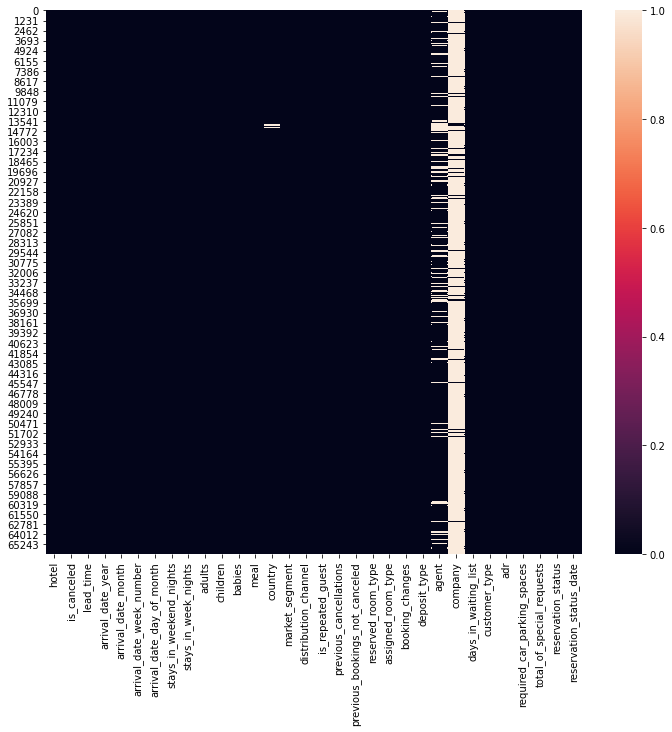

In [23]:
plt.figure(figsize= (12, 10))
sns.heatmap(data.isnull())

In [24]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [25]:
data.shape

(66448, 32)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66448 entries, 0 to 66447
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           66448 non-null  object 
 1   is_canceled                     66448 non-null  int64  
 2   lead_time                       66448 non-null  int64  
 3   arrival_date_year               66448 non-null  int64  
 4   arrival_date_month              66448 non-null  object 
 5   arrival_date_week_number        66448 non-null  int64  
 6   arrival_date_day_of_month       66448 non-null  int64  
 7   stays_in_weekend_nights         66448 non-null  int64  
 8   stays_in_week_nights            66448 non-null  int64  
 9   adults                          66448 non-null  int64  
 10  children                        66444 non-null  float64
 11  babies                          66448 non-null  int64  
 12  meal                            

In [27]:
# drop the fields which are not required

data.drop(['company', 'reservation_status_date'], axis=1, inplace=True)

In [28]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out


In [29]:
data['is_canceled'].value_counts()

0    34681
1    31767
Name: is_canceled, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


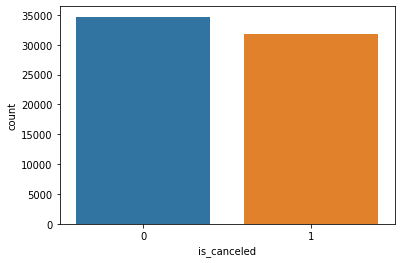

In [30]:
sns.countplot(data['is_canceled'])

In [31]:
# get data of unique hotels

data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [32]:
# get unique country codes

data['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [33]:
data['country'].nunique()

147

In [34]:
#create dummies

new_data = pd.get_dummies(data, drop_first=True)

In [35]:
new_data.shape

(66448, 219)

In [37]:
#split data
x = new_data.drop('is_canceled', axis=1)
y = new_data['is_canceled']

In [38]:
# split  dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [40]:
# try to get shape of training and testing variables

print("training set shape", x_train.shape, y_train.shape)
print("tsting set shape", x_test.shape, y_test.shape)

training set shape (53158, 218) (53158,)
tsting set shape (13290, 218) (13290,)


In [41]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier()

clf_xgb.fit(x_train, y_train,
            verbose = True,
            early_stopping_rounds = 10,
            eval_metric = 'auc',
            eval_set = [[x_test, y_test]])

[0]	validation_0-auc:1
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:1
[2]	validation_0-auc:1
[3]	validation_0-auc:1
[4]	validation_0-auc:1
[5]	validation_0-auc:1
[6]	validation_0-auc:1
[7]	validation_0-auc:1
[8]	validation_0-auc:1
[9]	validation_0-auc:1
[10]	validation_0-auc:1
Stopping. Best iteration:
[0]	validation_0-auc:1



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [43]:
# training and test set accuracy score

from sklearn.metrics import accuracy_score, plot_confusion_matrix

tr = clf_xgb.predict(x_train)

print("Training set accuracy", accuracy_score(y_train, tr))

te = clf_xgb.predict(x_test)

print("Testing set accuracy", accuracy_score(y_test, te))

Training set accuracy 1.0
Testing set accuracy 1.0
